In [1]:
import cv2
import scipy.signal
import numpy
from matplotlib import pyplot as plt

# Introduction to image processing

## Images in the computer

* 2 dimensional arrays usually recorded by CMOS or CCD matrix
* Colors are represented by multiple channels (layers) of 2D arrays

## Color images for human vision

* Follow color sensitivity of human eye
* Red - Green - Blue "channels"
* Large overlap between channels has consequences regarding color vision

<img src="human.png" style="width:50%; margin: auto">

## Color digital cameras

Try to achieve coverage close to human eye

* Bayer filter response functions
* CMOS sensor quantum efficiency

<img src="bayer.png" style="width:20%; margin: auto">
<img src="canon.png" style="width:50%; margin: auto">

## RGB displays

* Additive color mixing technique
* (As opposed to print which uses subtractive, hence CMYK colors)
* Three different color filter, OLED pixel, phosphor etc.
* sRGB, Adobe RGB etc. define the three base colors and their intended spectra

<img src="samsung.png" style="width:50%; margin: auto">

## CIE 1931 chromacity diagrams

* Graphical representation of human eye color sensitivity

<img src="cie_blackbody.jpg" style="width:50%; margin: auto">

* Narrow-band emitters can only cover their **convex hull** in color space
* This is called the **color gamut**
* Black curve: color gamut of _any_ reflective surface, i.e. paper
* White curve: color gamut of an sRGB display

<img src="cie_srgb.jpg" style="width:50%; margin: auto">

## White balance

* A perfectly white paper reflects all wavelengths of the sunlight equally
* But what if the light source is not the sun?
* Have to correct color channels accordingly

# Working with color images

Load a single image with JPEG compression

In [2]:
img = cv2.imread('garden.jpg')

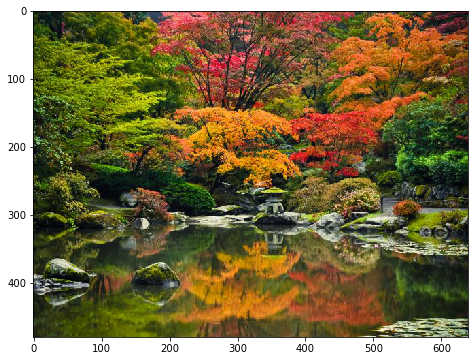

In [3]:
f = plt.figure(figsize=(10, 6))
plt.imshow(img[:, :, ::-1]);

The `img` variable is a numpy array, the dimensions are:

* pixel rows (image height)
* pixel columns (image width)
* color channels

In [4]:
img.shape

(480, 640, 3)

The pixel values 

* uint8 between 0 (black) and 255 (full intensity R, G or B)
* monitors need to be calibrated to account for color pixel spectrum
* white is 255, 255, 255 by definition
* for any gray, R, G and B must be equal

In [5]:
img.dtype

dtype('uint8')

It is straight forward to slice a rectangular part of a given color channel out of the image:

In [6]:
img[0:10,0:10,0]

array([[47, 29, 12, 15, 26, 37, 48, 60, 57, 48],
       [43, 26, 13, 12, 21, 28, 29, 27, 45, 52],
       [41, 28, 11,  4, 10, 20, 20, 13, 19, 46],
       [39, 33, 19,  7,  7, 13, 10,  3,  0, 29],
       [29, 36, 31, 15,  5,  4,  4,  2,  6, 19],
       [33, 36, 29, 10,  0,  2, 25, 46, 23, 16],
       [37, 35, 24,  5,  0,  5, 43, 80, 29, 14],
       [31, 30, 26, 16,  2,  3, 31, 67, 20,  8],
       [15, 30, 34, 74, 24, 21, 23, 43, 15,  6],
       [ 8, 16, 23, 47, 28, 15, 24, 39, 42, 23]], dtype=uint8)

## RGB channels

The actual order of channels is BGR.

Individual channels don't look nice as B&W images, need _combination_ of channels to make something that looks like traditional B&W photos, c.f. panchromatic photographic film.

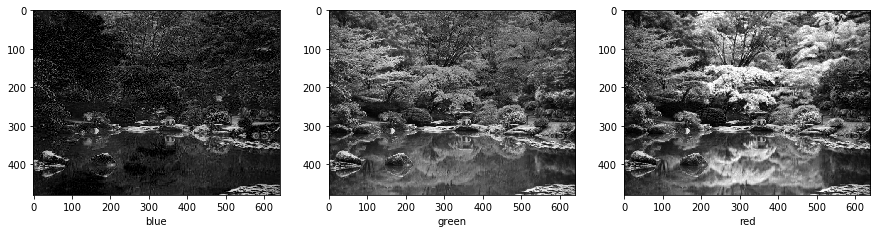

In [7]:
colors = ('blue', 'green', 'red')
f, axs = plt.subplots(1, 3, figsize=(15, 6))
for i in range(0, 3):
    axs[i].imshow(img[:,:,i], cmap='gray')
    axs[i].set_xlabel(colors[i]);

## Pixel value histograms

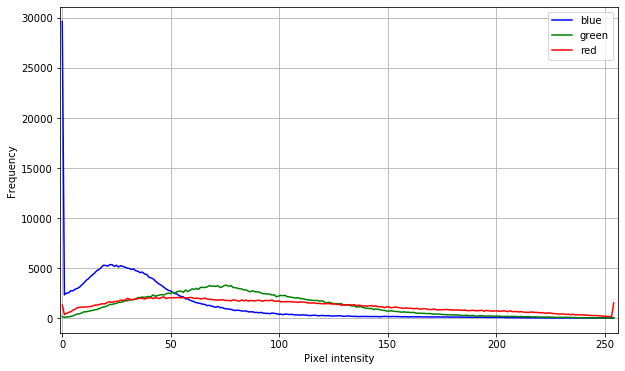

In [8]:
f = plt.figure(figsize=(10, 6))

for i in range(0, 3):
    hist, bins = numpy.histogram(img[:,:,i], range = (0, 255), bins = 256)
    plt.plot(bins[:-1], hist, '-', color = colors[i], label = colors[i])
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')
    plt.xlim(-1, 256)
    plt.grid()
    plt.legend();

## Histogram equalization is necessary for a nice image

* to fill dynamic range of display
* correct for any white balance issues originating from illumination

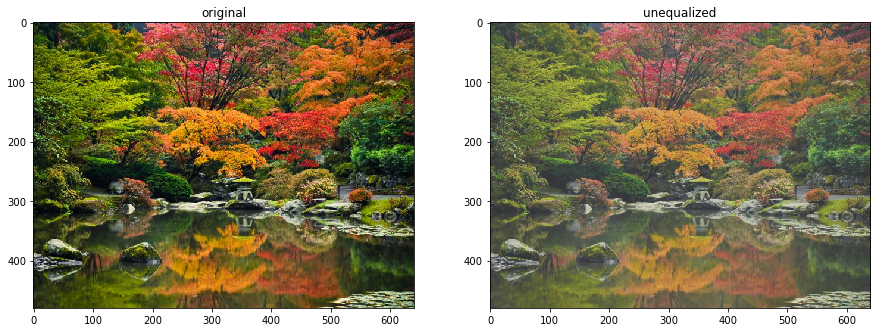

In [9]:
# We mimic an unequalized image here
f, ax = plt.subplots(ncols = 2, figsize=(15, 9))
ax[0].imshow(img[:, :, ::-1])
ax[0].set_title('original')
ax[1].imshow(numpy.uint8(50 + img[:, :, ::-1] / 1.5))
ax[1].set_title('unequalized');

## HSV color space

Due to the "leaks" in human color receptors, we see the color wheel

<img src="hsv_1.png" style="width:30%; margin: auto">

RGB value can be converted into HSV values without losing information

<img src="hsv_2.png" style="width:50%; margin: auto">

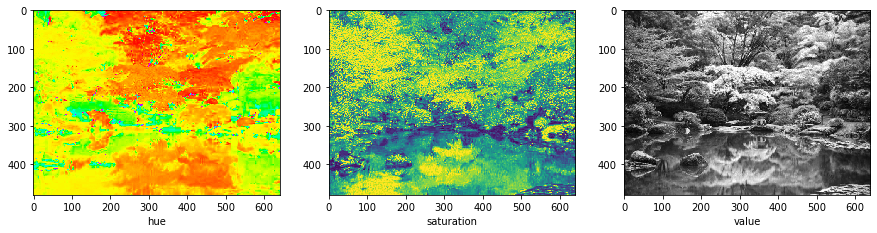

In [10]:
colors = ('hue', 'saturation', 'value')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
f, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(numpy.uint8((128-hsv[:,:,0]) % 256), cmap='hsv', vmin=0, vmax=255)
axs[0].set_xlabel(colors[0])

axs[1].imshow(hsv[:,:,1], cmap='viridis')
axs[1].set_xlabel(colors[1])
    
axs[2].imshow(hsv[:,:,2], cmap='gray')
axs[2].set_xlabel(colors[2]);

## Fun: rotating the color wheel

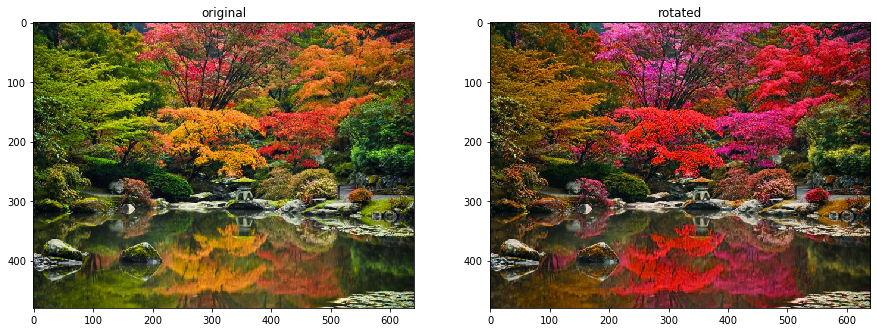

In [11]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv[:,:,0] = numpy.uint8((hsv[:,:,0] + 16) % 256)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

f, ax = plt.subplots(ncols = 2, figsize=(15, 9))
ax[0].imshow(img[:, :, ::-1])
ax[0].set_title('original')
ax[1].imshow(bgr)
ax[1].set_title('rotated');

## Desaturating an image

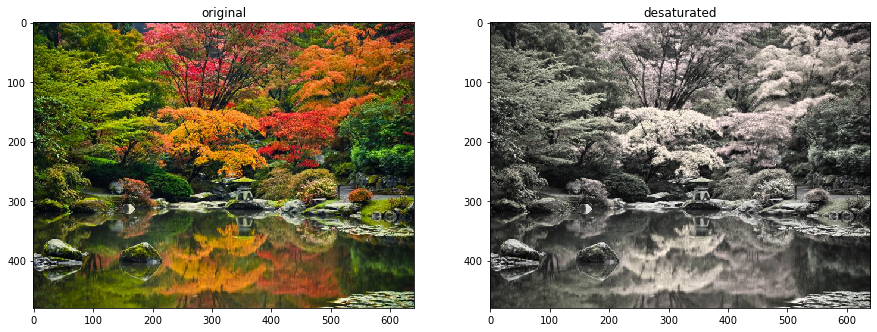

In [12]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv[:,:,1] //= 8
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

f, ax = plt.subplots(ncols = 2, figsize=(15, 9))
ax[0].imshow(img[:, :, ::-1])
ax[0].set_title('original')
ax[1].imshow(bgr)
ax[1].set_title('desaturated');

# Working with B&W images

## The pixel value histogram

In [13]:
# note all color channels contain equal pixel values at a given position, we work with one channel
img = cv2.imread('woman.jpg')[:, :, 0]

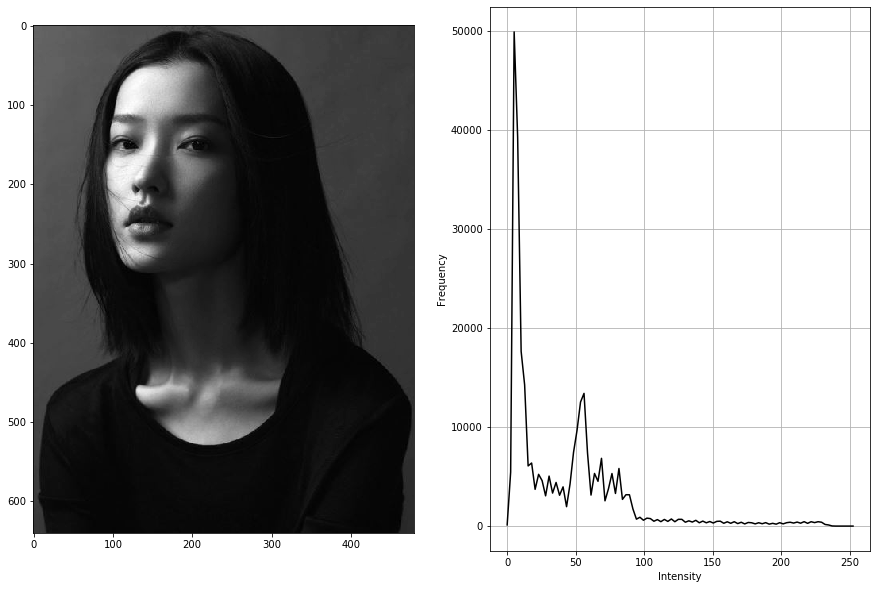

In [14]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(img, cmap='gray')

hist, bins = numpy.histogram(img, bins = 100, range = (0, 255))
axs[1].plot(bins[:-1], hist, '-k')
axs[1].set_xlabel('Intensity')
axs[1].set_ylabel('Frequency')
axs[1].grid();

## Gamma correction

Power-law transformation of the pixel value scale

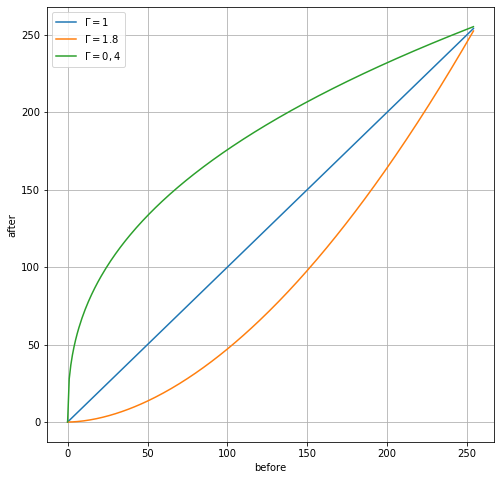

In [15]:
xx = numpy.arange(0, 255)
f = plt.figure(figsize = (8, 8))
plt.plot(xx, xx, label = '$\Gamma = 1$')
plt.plot(xx, 256 * (xx / 256) ** 1.8, label = '$\Gamma = 1.8$')
plt.plot(xx, 256 * (xx / 256) ** 0.4, label = '$\Gamma = 0,4$')
plt.xlabel('before')
plt.ylabel('after')
plt.grid()
plt.legend();

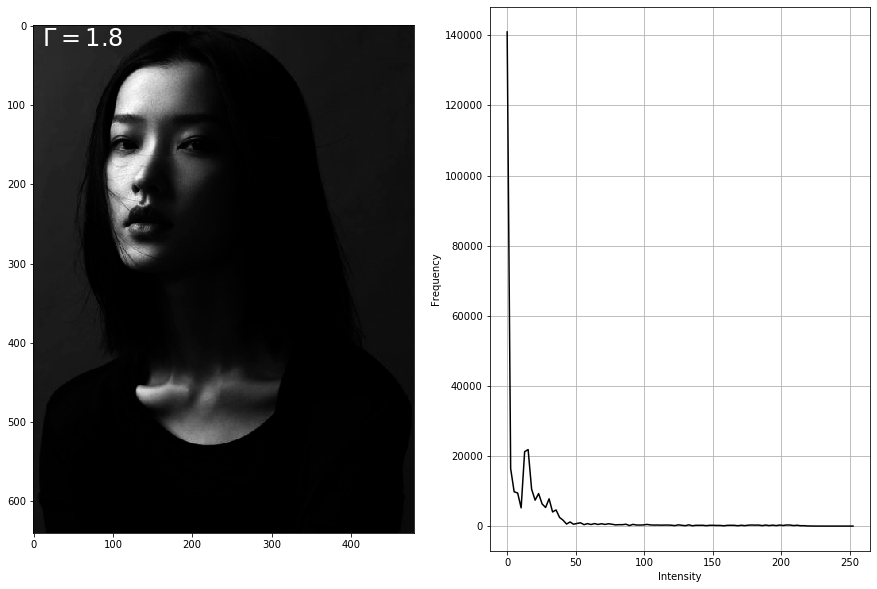

In [16]:
gg = numpy.uint8(256 * (img / 256)**1.8)

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(gg, cmap='gray')
axs[0].text(10, 25, "$\Gamma = 1.8$", color='white', fontsize=24)

hist, bins = numpy.histogram(gg, bins=100, range = (0, 255))
axs[1].plot(bins[:-1], hist, '-k')
axs[1].set_xlabel('Intensity')
axs[1].set_ylabel('Frequency')
axs[1].grid();

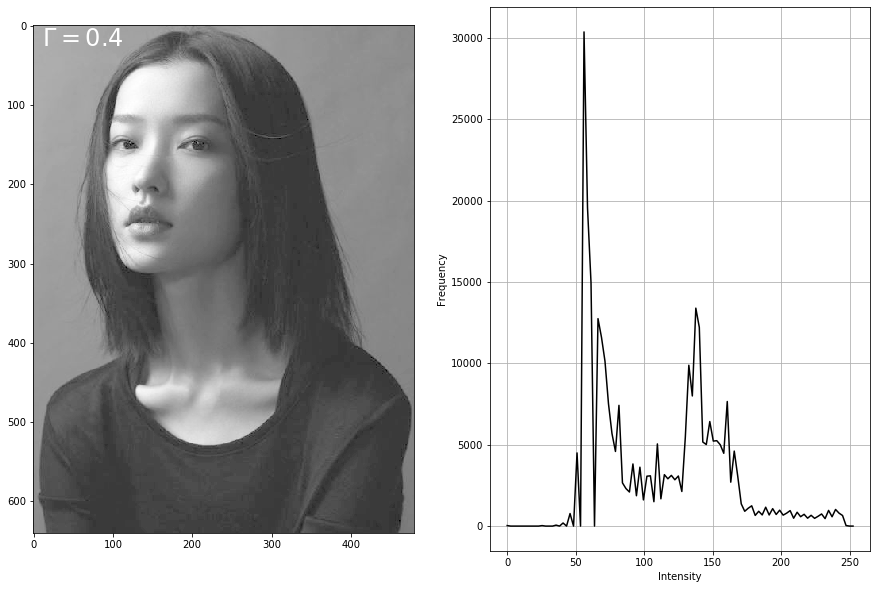

In [17]:
gg = numpy.uint8(256 * (img / 256)**0.4)

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(gg, cmap='gray')
axs[0].text(10, 25, "$\Gamma = 0.4$", color='white', fontsize=24)

hist, bins = numpy.histogram(gg, bins=100, range = (0, 255))
axs[1].plot(bins[:-1], hist, '-k')
axs[1].set_xlabel('Intensity')
axs[1].set_ylabel('Frequency')
axs[1].grid();

## Thresholding

Limit pixel values to a certain interval

* Technique also works for color images, especially in HSV representation

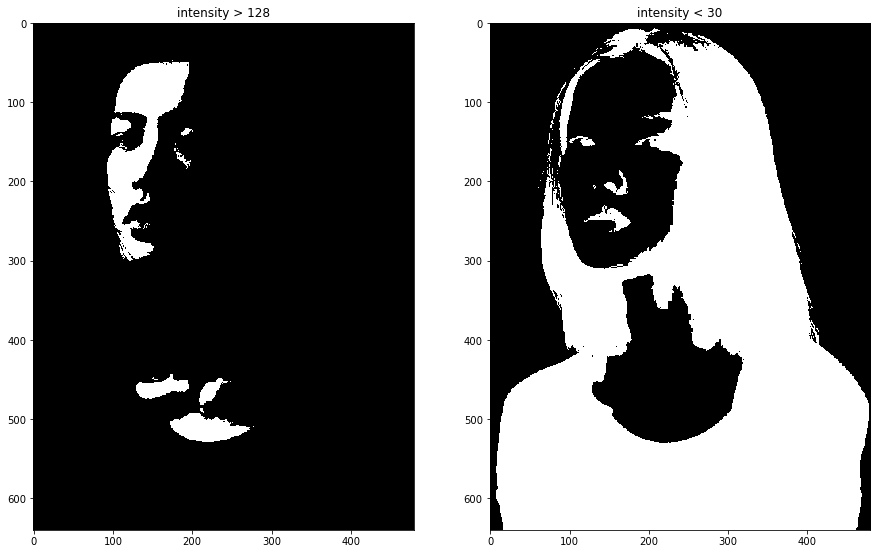

In [18]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

lim1 = numpy.full(img.shape, numpy.uint8(0))
lim1[(img > 128)] = numpy.uint8(255)
axs[0].set_title('intensity > 128')
axs[0].imshow(lim1, cmap='gray')

lim2 = numpy.full(img.shape, numpy.uint8(0))
lim2[(img < 30 )] = numpy.uint8(255)
axs[1].set_title('intensity < 30')
axs[1].imshow(lim2, cmap='gray');

## Erosion and dilation

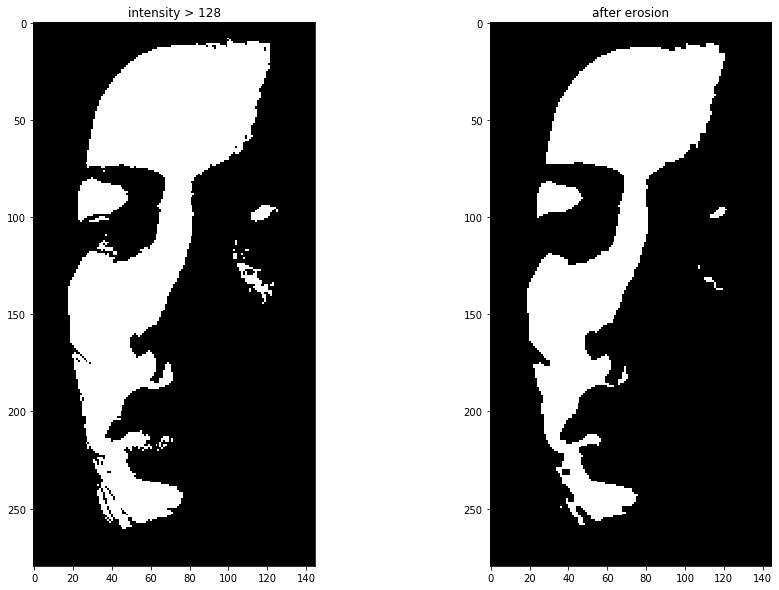

In [19]:
zoom = lim1[40:320,75:220]

f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].set_title('intensity > 128')
axs[0].imshow(zoom, cmap='gray')

kernel = numpy.full((3, 3), 1)
er = cv2.erode(zoom, kernel, 1)
axs[1].set_title('after erosion')
axs[1].imshow(er, cmap='gray');

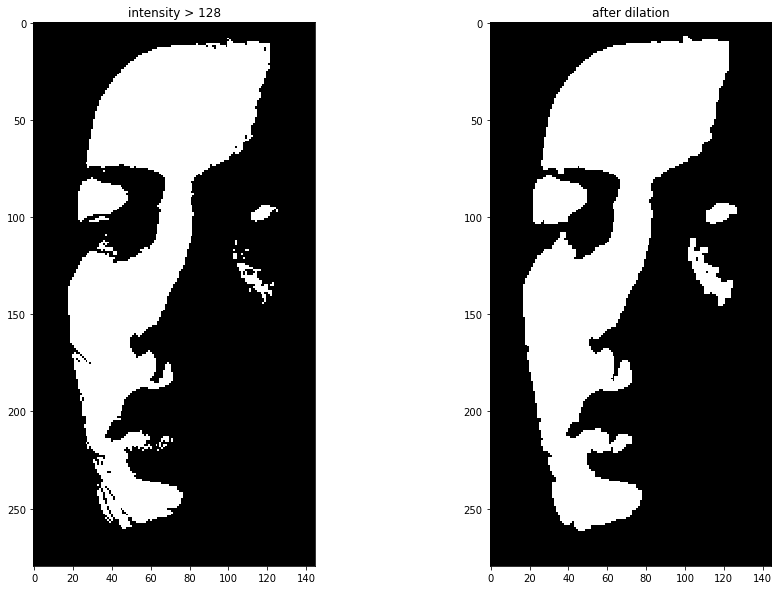

In [20]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].set_title('intensity > 128')
axs[0].imshow(zoom, cmap='gray')

kernel = numpy.full((3, 3), 1)
dil = cv2.dilate(zoom, kernel, 1)
axs[1].set_title('after dilation')
axs[1].imshow(dil, cmap='gray');

## The difference of the two: simple edge detection

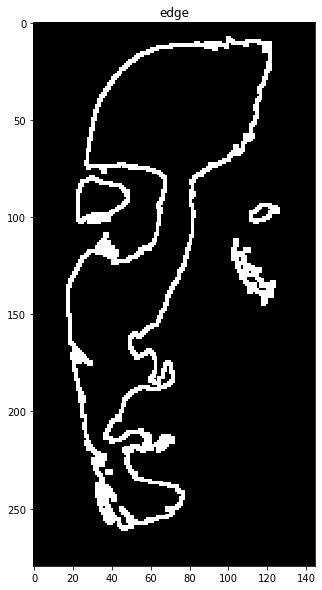

In [21]:
plt.figure(figsize=(7, 10))

plt.title('edge')
plt.imshow(numpy.uint8(dil - er), cmap='gray');

## Find connected components

* nlabel: number of diffent connected components
* labels: id of component for each pixel of original image
* stats: some statistics of each component, i.e. number of pixels, width, height etc.
* centroids: center of each component

In [22]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(numpy.uint8(dil))

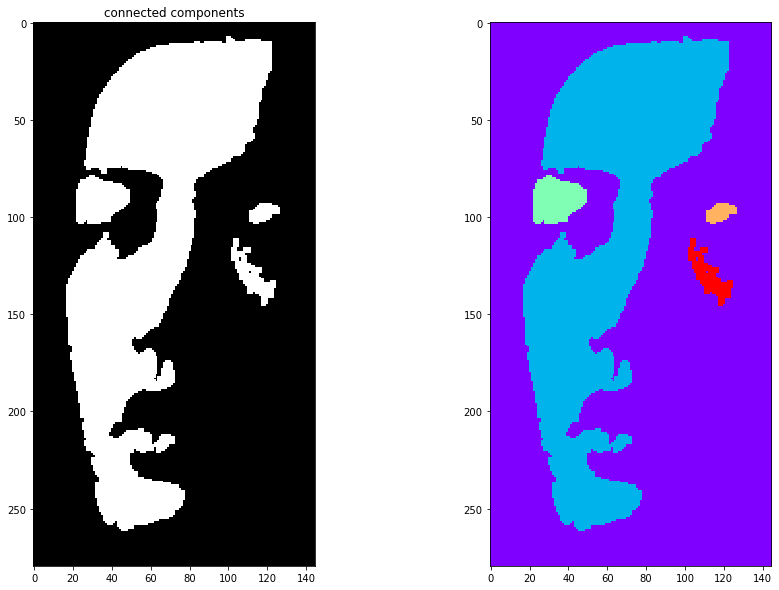

In [23]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].set_title('dilated image')
axs[0].imshow(dil, cmap='gray')
axs[0].set_title('connected components')
axs[1].imshow(labels, cmap='rainbow');

# Convolution with 2D kernels

Can be used to blur image, find edges, etc.

## Blur image using boxcar kernel

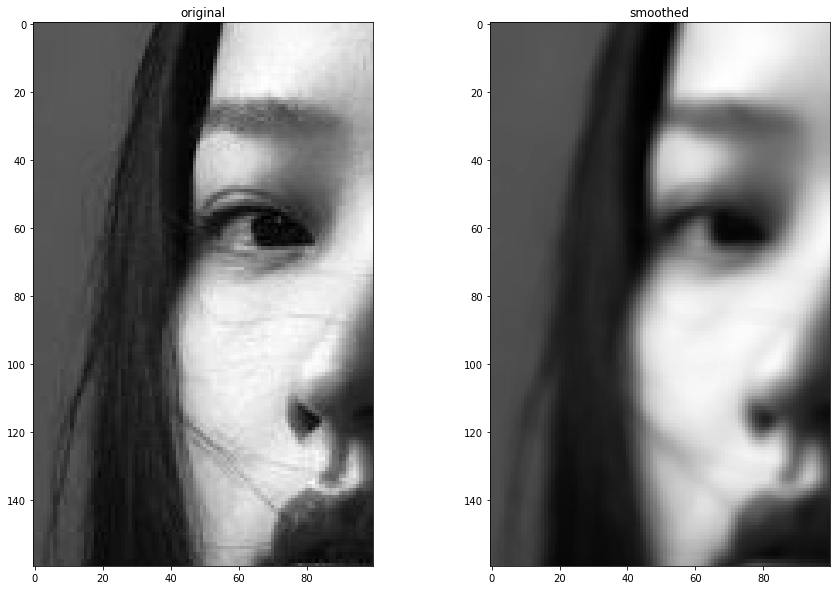

In [24]:
k = numpy.full((5, 5), 1, dtype = numpy.double)
k /= k.sum()

cnv = scipy.signal.convolve2d(img, k, mode='same')

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].set_title('original')
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].set_title('smoothed')
axs[1].imshow(cnv[90:250,50:150], cmap='gray');

## Unsharp masking

Convolving with a boxcar kernel basically acts as a simple lowpass filter: removes high frequency components of the image

Subtracting blurred image from the original should keep the high frequency components, i.e. works like a high pass filter and effectively sharpens the image.

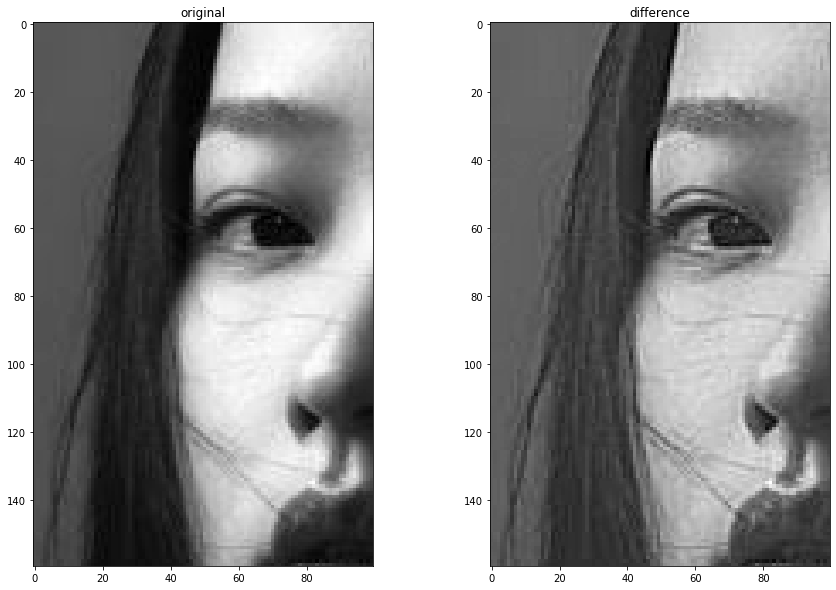

In [25]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].set_title('original')
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].set_title('difference')
axs[1].imshow(img[90:250,50:150] - 0.5 * cnv[90:250,50:150], cmap='gray');

## Detect edges with directional kernels

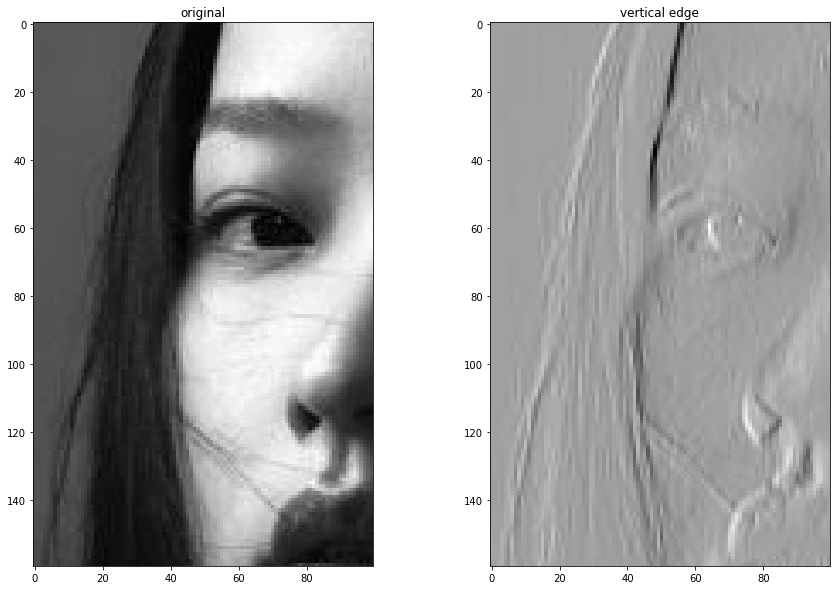

In [26]:
k = numpy.array([[-1, 1], [-1, 1], [-1, 1]], dtype = numpy.double)

cnv = scipy.signal.convolve2d(img, k, mode='same')

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].set_title('original')
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].set_title('vertical edge')
axs[1].imshow(cnv[90:250,50:150], cmap='gray');

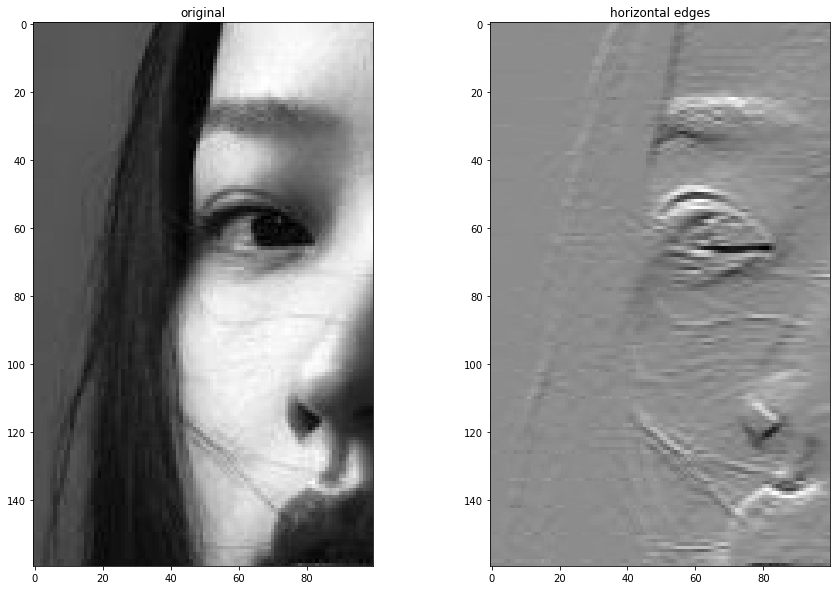

In [27]:
k = numpy.array([[-1, -1, -1], [1, 1, 1]], dtype = numpy.double)

cnv = scipy.signal.convolve2d(img, k, mode='same')

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].set_title('original')
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].set_title('horizontal edges')
axs[1].imshow(cnv[90:250,50:150], cmap='gray');

# Working with video

Video streams are practically a sequence of static images. Working with such series one is able to capture information about some changes in time.

Note the fact, however, that in order to save storage place and to make sure information can be transferred accross a network with an optimal rate most often a lossy compression is applied to images and video streams too. The lossy compression will always have a fingerprint on images and the frames of video streams after decoding. In such situation consider it when doing any image processing. When you work with an image source of lossy compressed content after you extract some knowledge out of the data always make sure it is not an artefact arising from the compression itself.

Here we show an example how to access a video stream and grab image frames one-by-one.
1. open device
1. grab some images
1. close device

In [29]:
url = 'https://stream.idokep.hu/live/hotelvictoria/s_orig.m3u8'
vc = cv2.VideoCapture(url)
assert vc.isOpened(), f'cannot open {url}'

In [30]:
n_frames = 9
frames = []
for n in range(n_frames):
    flag, f = vc.read()
    if not flag:
        print (f'Ooops at {n} frame')
        continue
    frames.append(f)

In [31]:
vc.release()

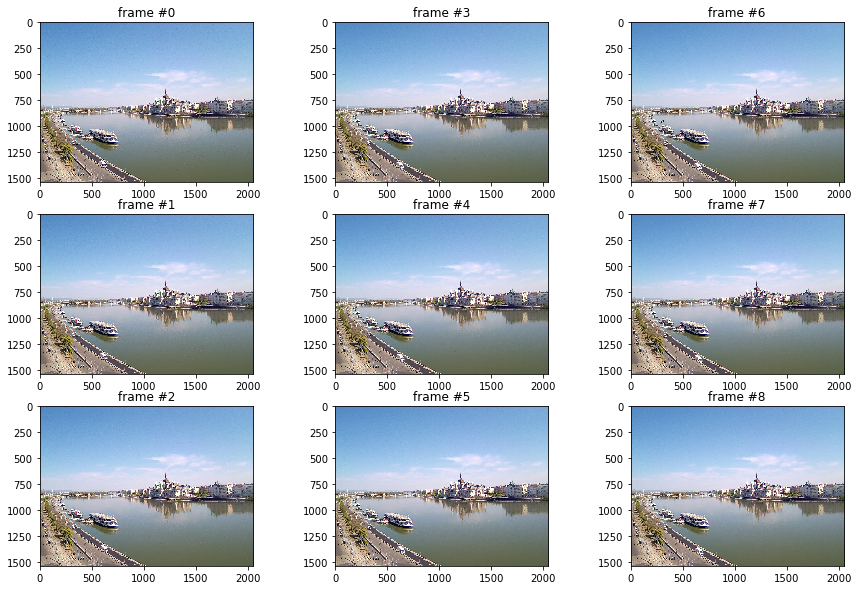

In [32]:
f, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(15, 10))
for i, f in enumerate(frames):
    axs[i % 3, i // 3].set_title(f'frame #{i}')
    axs[i % 3, i // 3].imshow(f[:, :, ::-1]);

One can apply image processing methods to frames like above. Furthermore operations can be defined for the frameseries as well.

Considering a situation where pixel intensity varies slowly over time, the difference of adjacent frames vanish to noise except for regions where changes in the scene is present. Based on this fact motion detection is possible.

Similarly collecting some statistics of color channel intensities one can talk about the typical background, which may be eliminated from the images.

In [43]:
frames = numpy.array(frames, dtype = numpy.double)
frames.shape

(9, 1536, 2048, 3)

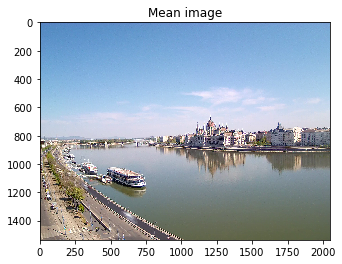

In [49]:
mu = frames.mean(axis = 0)
plt.title('Mean image')
plt.imshow(numpy.uint8(mu[:, :, ::-1]));

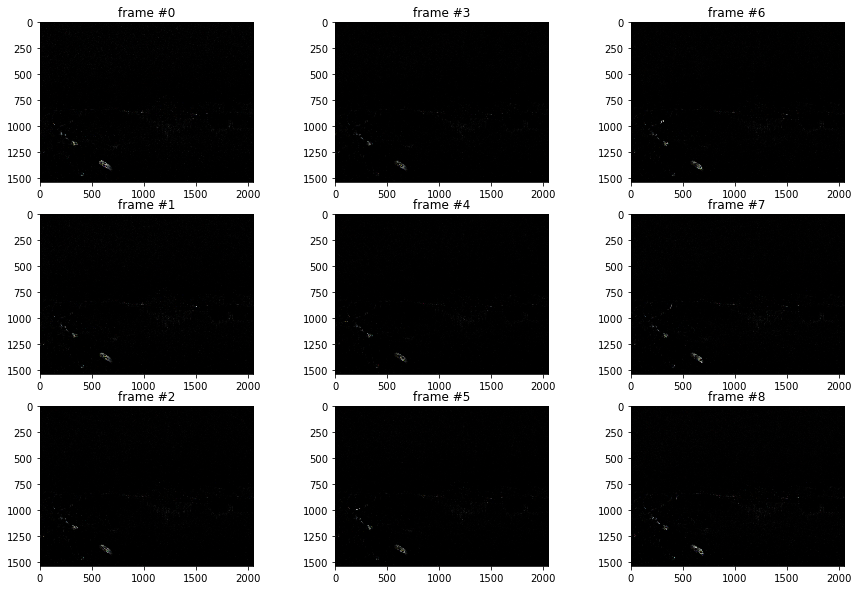

In [51]:
f, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(15, 10))
for i, f in enumerate(frames):
    axs[i % 3, i // 3].set_title(f'frame #{i}')
    axs[i % 3, i // 3].imshow(numpy.uint8(abs(f - mu)[:, :, ::-1]));

Doing image processing in real time is a demanding task. One has to optimize calculations as much as possible so that the whole processing operations (also called a pipeline) consumes less time or less time average in the long run that the reciprocal of the framerate. Otherwise, extracted information will be delayed and the calculation burden will diverge in time.

Optimisation possibilities will vary from problem to problem, but some trivial ideas may also help:
* do calculations on a restricted parts of a frame.
* restrict the set of frames in time. Drop frames to make effective framerate smaller to put it different.
* if time to process data fluctuates but the mean time is okay, one may consider including queues in the process pipeline to smooth extracted information delivery.